In [104]:
import pandas as pd

In [105]:
dataFrame = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/bisiklet_fiyatlari.xlsx")

In [106]:
dataFrame.head() # ilk 5 satırı getirir.

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [107]:
import seaborn as sbn
import matplotlib.pyplot as plt

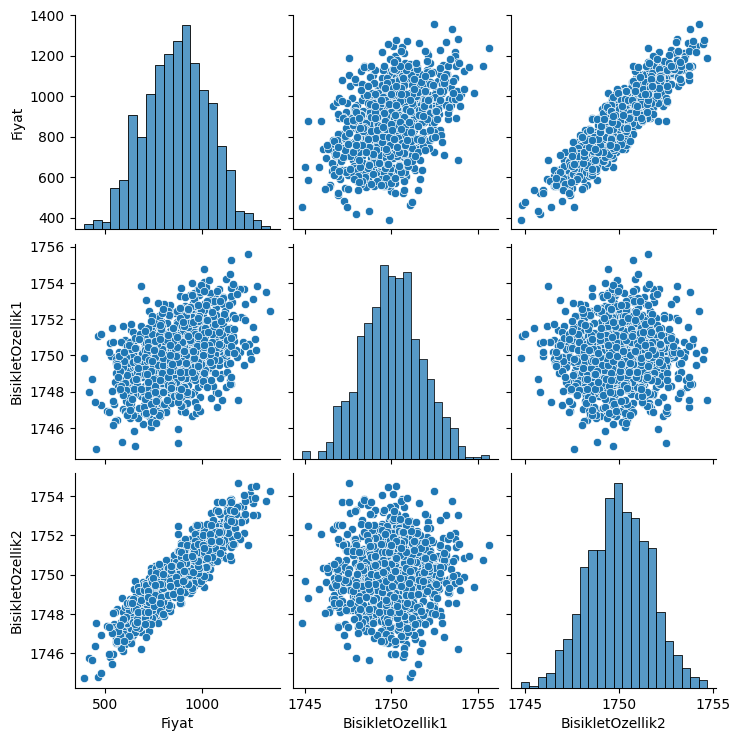

In [108]:
sbn.pairplot(dataFrame) # Farklı farklı grafikleri çıkarır.

# **VERİYİ TEST/TRAİN OLARAK İKİYE AYIRMAK**

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
# train_test_split

In [111]:
# y = wx + b
# y -> label

y = dataFrame["Fiyat"].values # numpy dizisi olarak kaydettik

# x -> feature (Özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)
# test size verinin ne kadarını kullancağını belirler
# sonucları aynı çıkarmak için kulllanılır

In [112]:
x_train.shape #veri sayısını verir

(670, 2)

In [113]:
x_test.shape

(330, 2)

In [114]:
y_train.shape

(670,)

In [115]:
y_test.shape

(330,)

# **SCALİNG**

In [116]:
from sklearn.preprocessing import MinMaxScaler

In [117]:
scaler = MinMaxScaler()

In [118]:
scaler.fit(x_train)

MinMaxScaler()

In [119]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [120]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [121]:
import tensorflow as tf

In [122]:
from tensorflow.keras.models import Sequential #Model sınıfı hangi katmanlarda çalışacağımızı ayarlıyoruz.
from tensorflow.keras.layers import Dense # Katmaları oluşturma kütüphanesi

In [123]:
# Model Hazırlama
model = Sequential()

model.add(Dense(4,activation="relu")) # Katmanları oluşturmak için yazıyoruz
model.add(Dense(4,activation="relu")) # 4 sayısını istediğimiz katman kadar yazıyoruz
model.add(Dense(4,activation="relu"))

model.add(Dense(1)) # Çıkış nöronu ayarlamak için kullanılır.

model.compile(optimizer="rmsprop",loss = "mse") # Regresyon Modelini seçiyoruz.

In [124]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
21/21 [==============================] - 1s 2ms/step - loss: 795905.5000
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 795831.6875
Epoch 3/500
21/21 [==============================] - 0s 6ms/step - loss: 795759.0000
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 795678.9375
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 795584.8125
Epoch 6/500
21/21 [==============================] - 0s 3ms/step - loss: 795466.5000
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 795324.0625
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 795153.8750
Epoch 9/500
21/21 [==============================] - 0s 4ms/step - loss: 794954.7500
Epoch 10/500
21/21 [==============================] - 0s 5ms/step - loss: 794723.9375
Epoch 11/500
21/21 [==============================] - 0s 4ms/step - loss: 794454.7500
Epoch 12/500
21/21 [==============================] - 0s 3ms/st

In [125]:
loss = model.history.history["loss"] # Sözlükten kurtarmak için

<Axes: >

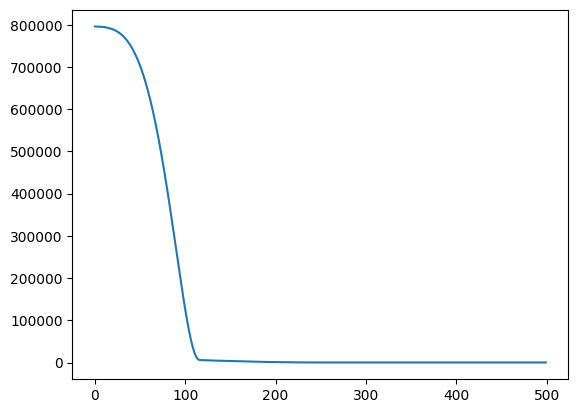

In [126]:
sbn.lineplot(x=range(len(loss)),y= loss)

In [127]:
trainLoss = model.evaluate(x_train, y_train) #loss kayıplarını verir

21/21 [==============================] - 0s 2ms/step - loss: 73.0670


In [128]:
trainLossVerbose = model.evaluate(x_train, y_train,verbose=0) #loss kayıplarını verir

In [129]:
testLoss = model.evaluate(x_test,y_test)

11/11 [==============================] - 0s 2ms/step - loss: 76.7713


In [130]:
testLoss

76.7712631225586

In [131]:
testTahminleri = model.predict(x_test) # Model tahmini yapar

11/11 [==============================] - 0s 2ms/step


In [132]:
testTahminleri

array([[1077.7987 ],
       [ 623.5757 ],
       [ 876.00195],
       [ 894.09357],
       [ 899.3518 ],
       [ 451.13403],
       [ 931.04785],
       [ 991.3681 ],
       [ 941.14514],
       [1016.74084],
       [ 750.7599 ],
       [ 917.7975 ],
       [ 947.40533],
       [1054.6926 ],
       [1121.5076 ],
       [ 681.3367 ],
       [1126.9786 ],
       [ 650.6644 ],
       [1154.6157 ],
       [ 886.4363 ],
       [ 892.7086 ],
       [ 716.5991 ],
       [ 456.5089 ],
       [ 611.7351 ],
       [ 834.87854],
       [1091.2288 ],
       [ 713.56665],
       [ 756.6964 ],
       [ 873.34033],
       [ 770.44   ],
       [ 450.9152 ],
       [ 782.90485],
       [ 728.0833 ],
       [ 646.5547 ],
       [ 886.6135 ],
       [ 843.662  ],
       [1035.7172 ],
       [1022.7559 ],
       [ 844.8037 ],
       [ 862.08765],
       [ 756.9656 ],
       [1174.6288 ],
       [1097.6265 ],
       [1087.8328 ],
       [ 873.07886],
       [ 596.35486],
       [1145.7659 ],
       [ 973.

In [133]:
tahminDF = pd.DataFrame(y_test,columns=["Gerçek Y"])

In [134]:
tahminDF

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [135]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [136]:
testTahminleri

0      1077.798706
1       623.575684
2       876.001953
3       894.093567
4       899.351807
          ...     
325    1013.530396
326     790.630981
327     765.798157
328    1167.655518
329     802.566040
Length: 330, dtype: float32

In [137]:
tahminDF =pd.concat([tahminDF,testTahminleri],axis=1)

In [138]:
tahminDF

,Gerçek Y,0
0,1081.652164,1077.798706
1,622.675990,623.575684
2,889.356810,876.001953
3,902.826733,894.093567
4,897.662404,899.351807
...,...,...
325,1028.438035,1013.530396
326,789.934950,790.630981
327,758.490486,765.798157
328,1172.871659,1167.655518


In [139]:
tahminDF.columns = ["Gerçek Y","Tahmin Y"]

In [140]:
tahminDF

,Gerçek Y,Tahmin Y
0,1081.652164,1077.798706
1,622.675990,623.575684
2,889.356810,876.001953
3,902.826733,894.093567
4,897.662404,899.351807
...,...,...
325,1028.438035,1013.530396
326,789.934950,790.630981
327,758.490486,765.798157
328,1172.871659,1167.655518


<Axes: xlabel='Gerçek Y', ylabel='Tahmin Y'>

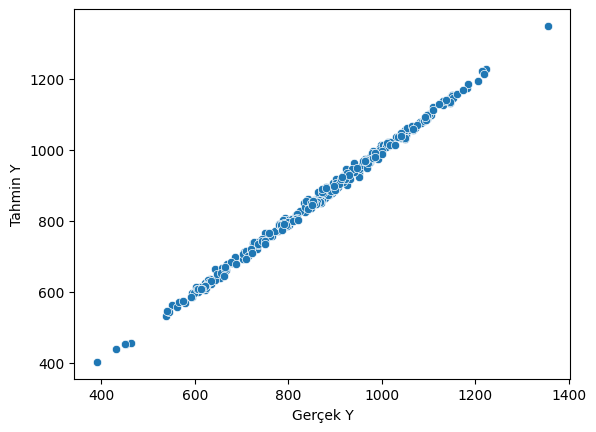

In [141]:
sbn.scatterplot(x ="Gerçek Y", y="Tahmin Y", data = tahminDF)

In [142]:
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [143]:
mean_absolute_error(tahminDF ["Gerçek Y"], tahminDF["Tahmin Y"])

7.021040691717564

In [144]:
mean_squared_error(tahminDF ["Gerçek Y"], tahminDF["Tahmin Y"])

76.7712715025465

In [145]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [150]:
yeniBisikletÖzellikleri = [[1750,1752]]

In [151]:
yeniBisikletÖzellikleri = scaler.transform(yeniBisikletÖzellikleri)

In [152]:
yeniBisikletÖzellikleri

array([[0.47099003, 0.72435165]])

In [153]:
model.predict(yeniBisikletÖzellikleri)

1/1 [==============================] - 0s 20ms/step


array([[1051.3748]], dtype=float32)

In [156]:
from tensorflow.keras.models import load_model # Model kayıt etmek için kullanılır.

In [157]:
model.save("bisiklet_modeli.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [159]:
sonradanCagrilanModel = load_model("bisiklet_modeli.h5")

In [160]:
sonradanCagrilanModel.predict(yeniBisikletÖzellikleri)

1/1 [==============================] - 0s 296ms/step


array([[1051.3748]], dtype=float32)